In [24]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.datasets import make_blobs
from tensorflow.keras.utils import to_categorical

print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

# Hides the GPU from TensorFlow
tf.config.set_visible_devices([], 'GPU') 

Num GPUs Available: 1


## Notes for me

### Simple Linear Regression with Keras

In [3]:
n = 1000  # observations
b0 = 30   # intercept
b1 = 5    # slope

np.random.seed(123)

x = np.random.uniform(-1, 1, size=n).reshape(-1, 1) # Features in 2D array for sklearn
y = b0 + b1*x.squeeze() + np.random.normal(size=n)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - loss: 676.8830
Epoch 2/10
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 248.3154

/Users/paulkoslowsky/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - loss: 190.7096
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - loss: 52.6107
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - loss: 16.4119
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - loss: 5.5374
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6434
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - loss: 1.5941
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - loss: 1.3737
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - loss: 1.0939
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - loss: 1.0275


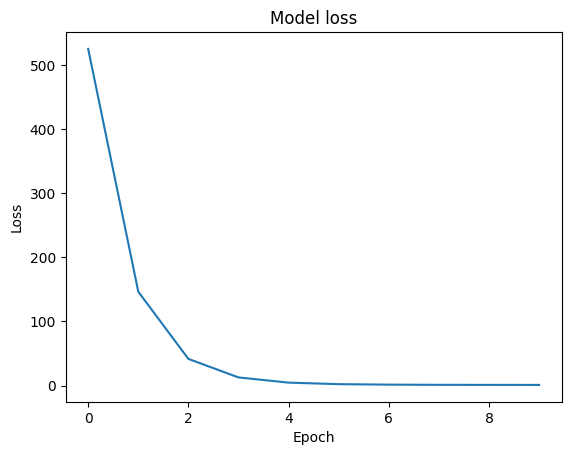

In [4]:
# Define model architecture
model = keras.Sequential([
    keras.layers.Dense(units=1, input_shape=(1,))
])

# Compile model
model.compile(optimizer='sgd', loss='mse')

# Fit model
history = model.fit(x, y, epochs=10)

# Plot loss
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [ ]:
model.get_weights()

[array([[4.2546544]], dtype=float32), array([29.932415], dtype=float32)]

### BINARY

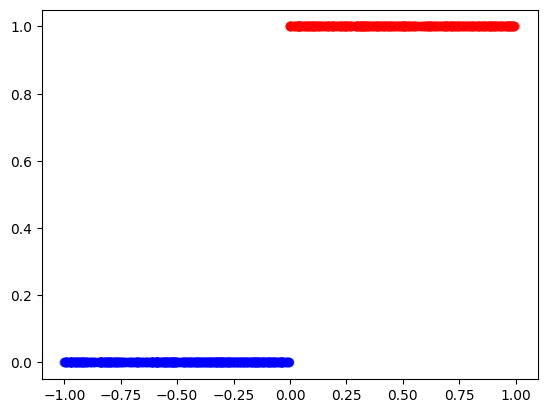

In [8]:
# Generate synthetic data for binary classification
np.random.seed(123)
x = np.random.uniform(-1, 1, size=n)
y = np.where(x > 0, 1, 0)

# Plot
plt.scatter(x, y, c=y, cmap='bwr', alpha=0.5)
plt.show()

Epoch 1/30


/Users/paulkoslowsky/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - accuracy: 3.7920e-04 - loss: 0.9129
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - accuracy: 0.0042 - loss: 0.8854
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - accuracy: 0.0026 - loss: 0.8518  
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 0.0064 - loss: 0.8317  
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - accuracy: 0.0061 - loss: 0.8005  
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - accuracy: 0.0159 - loss: 0.7793
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0240 - loss: 0.7562 
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - accuracy: 0.0644 - loss: 0.7330
Epoch 9/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - accuracy: 0.1438 - loss: 0.7123
Epoch 10/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - accuracy: 0.5307 - loss: 0.6925
Epoch 11/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - accuracy: 0.8314 - loss: 0.6740
Epoch 12/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step -

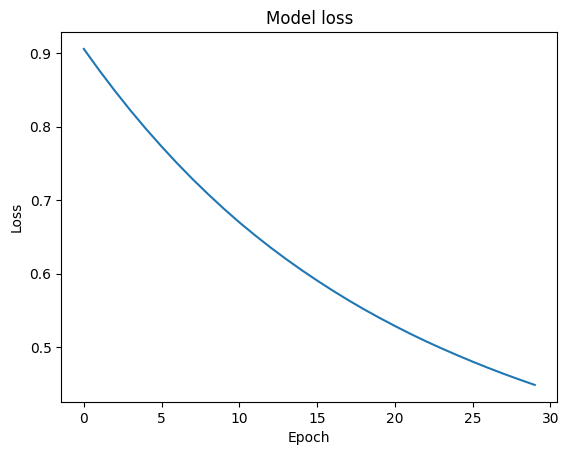

In [15]:
### Sigmoid Activation Function

#When predicting a binary response, we use a sigmoid activation function.
# Define model architecture
model = keras.Sequential([
    keras.layers.Dense(units=1, input_shape=(1,), activation='sigmoid')
])

# Compile model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Fit model
history = model.fit(x, y, epochs=30, verbose=1)

# Plot loss
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [11]:
model.get_weights()

[array([[3.9590526]], dtype=float32), array([-0.03301461], dtype=float32)]

| Parameter      | What It Does                                  | Increase Effect                                  | Decrease Effect                                | Notes                                  |
|----------------|-----------------------------------------------|--------------------------------------------------|------------------------------------------------|----------------------------------------|
| `learning_rate`| Controls how big each weight update is        | Faster training, can become unstable             | Slower but more stable                         | Try 0.01–0.1                           |
| `momentum`     | Helps the model keep moving in the right direction by remembering past updates            | Smoother updates, faster convergence             | More fluctuation, less smoothing               | Try 0.9–0.99                           |
| `epochs`       | How many times the model sees the data        | More learning, risk of overfitting               | May stop too early, underfitting               | Try 100–300                            |
| `batch_size`   | How many samples to process before updating   | More stable updates, faster training per epoch   | Noisier learning, possibly better generalization| Try powers of 2: 32–256                |
| `input_shape`  | Defines the shape of each input data point    | — depends on number of input features            | — must match feature count in your data        | E.g. `(3,)` for 3 input features       |
| `layers`       | Number of hidden layers in the model          | More capacity to learn complex patterns          | Simpler model, may underfit                    | Start with 1–3 hidden layers           |


| Optimizer         | In Email Example It...                                                   |
|-------------------|---------------------------------------------------------------------------|
| **SGD**           | Learns based on each email, can get shaky                                |
| **SGD + Momentum**| Learns more smoothly, remembers past spam indicators                     |
| **RMSprop**       | Treats features differently — adapts learning to each pattern            |
| **Adam**          | Does both: remembers trends and adapts — often best for tricky data like emails |


| Keras Tool/Parameter                | What It Does (Simple Explanation)                                               | Email Spam Analogy                                                                                   |
|------------------------------------|----------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------|
| `EarlyStopping`                    | Stops training when validation loss stops improving.                            | Stops updating the spam filter if it's no longer getting better at catching spam.                    |
| `patience` (in EarlyStopping)      | Number of epochs to wait for improvement before stopping.                       | Waits for 3 new emails without progress before deciding training is done.                            |
| `restore_best_weights=True`        | Rolls back to the best model seen during training.                              | Keeps the version of the spam filter that made the fewest mistakes during testing.                   |
| `min_delta`                        | Minimum amount of improvement needed to reset the patience counter.             | If the spam detection only improves a tiny bit, don’t bother continuing training.                    |
| `ReduceLROnPlateau`                | Reduces the learning rate when improvement stalls.                              | If the filter isn’t improving, tell it to slow down and adjust more carefully.                       |
| `patience` (in ReduceLROnPlateau)  | How many stagnant epochs to wait before reducing the learning rate.             | Give it 1 more email without learning before dialing back how aggressively it learns.                |
| `factor`                           | How much to shrink the learning rate when reducing.                             | Reduce the learning rate to 10% of the current rate for finer adjustments.                           |
| `LearningRateScheduler`            | Custom rule for changing learning rate over time.                               | You decide a strategy like “learn fast at first, then slow down” based on your training timeline.    |
| `categorical_crossentropy`         | Measures how wrong the predicted class distribution is.                         | Compares if the email is “Marketing” or “Phishing” and punishes big mismatches in probability.       |
| `SGD` (Stochastic Gradient Descent)| Adjusts weights a little at a time using small data batches.                    | Learns from a few emails at a time instead of the whole inbox.                                       |



Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8961 - accuracy: 0.7644 - loss: 0.9903 - val_AUC: 0.9937 - val_accuracy: 0.9350 - val_loss: 0.1684
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.9945 - accuracy: 0.9367 - loss: 0.1564 - val_AUC: 0.9950 - val_accuracy: 0.9337 - val_loss: 0.1600
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.9957 - accuracy: 0.9419 - loss: 0.1433 - val_AUC: 0.9938 - val_accuracy: 0.9450 - val_loss: 0.1581
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.9961 - accuracy: 0.9439 - loss: 0.1343 - val_AUC: 0.9953 - val_accuracy: 0.9362 - val_loss: 0.1543
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.9958 - accuracy: 0.9369 - loss: 0.1451 - val_AUC: 0.9953 - val_accuracy: 0.9350 - val_loss: 0.1547
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.9953 - accuracy: 0.9345 - loss: 0.1537 - val_AUC: 0.9946 - val_accuracy: 0.9413 - val_loss: 0.1543
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

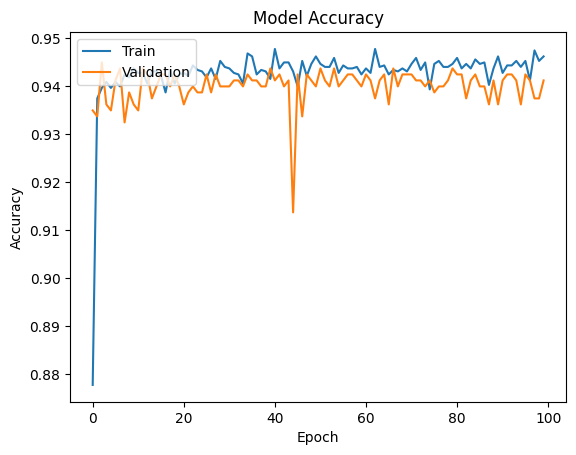

In [18]:
# Example:

# Set random seed for reproducibility
np.random.seed(123)

# Generate synthetic multi-class data
# 5000 samples, 4 classes, 3 input features
x, y = make_blobs(n_samples=5000, centers=4, n_features=3, cluster_std=3, random_state=42)
y_cat = to_categorical(y)  # Convert to one-hot encoded labels

# Train-test split: 80% train, 20% test
x_train, x_test, y_train, y_test = train_test_split(x, y_cat, test_size=0.2, random_state=42)

# === Define Model Architecture ===
model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(3,)),     # 3 input features, 16 neurons (width)
    # keras.layers.Dense(16, activation='relu'),                     # Optional: add more layers for more depth
    keras.layers.Dense(y_cat.shape[1], activation='softmax')         # Output: 4 classes (softmax for multi-class)
])

# === Compile the Model ===
model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),  # Tunable: learning rate, momentum
    loss='categorical_crossentropy',                                   # Suitable for multi-class classification
    metrics=['accuracy', 'AUC']                                        # Evaluate both accuracy and AUC
)

# === Train the Model ===
history = model.fit(
    x_train, y_train,
    epochs=100,                   # Can tune: try 100–300
    batch_size=64,                # Can tune: try powers of 2 like 32, 64, 128
    validation_split=0.2,         # 20% of training used for validation
    verbose=1
)

# === Plot Training & Validation Accuracy ===
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


## Model Accuracy Graph Interpretation

- **Blue Line (Train Accuracy)**
  - Shows how well the model is performing on training data over 100 epochs
  - Remains consistently high (around 94–95%)
  - Indicates the model has learned the training data well

- **Orange Line (Validation Accuracy)**
  - Tracks performance on unseen validation data (20% of training set)
  - Slightly lower and more volatile than training accuracy
  - Occasional dips (e.g., around epoch 45) suggest some sensitivity to data batches

- **Early Plateau (Epochs 10–20)**
  - Both train and validation accuracy stabilize early
  - Suggests model converges quickly on this relatively simple classification task

- **Gap Between Lines**
  - Slight gap between training and validation accuracy (~0.01)
  - Small overfitting is present, but not severe
  - Model is generalizing well overall

- **Spikes/Dips**
  - The sharp drop in validation accuracy around epoch 45 is likely due to:
    - Batch sensitivity
    - Temporary local missteps in optimization
  - Still recovers, so not concerning unless it becomes frequent

- **Takeaway**
  - Your model is performing well
  - If you want to improve stability:
    - Try increasing `batch_size` to reduce noise
    - Use `early_stopping` to stop training if validation stops improving
    - Try `Adam` optimizer for potentially smoother learning


In [20]:
# MNIST EXAMPLE

# We are building a spam detection model (for handwritten digits here, but we use the analogy for emails).
# Let's say the input features are the words and punctuation in the email, turned into numbers.

# Create the neural network using Keras
network = Sequential([
    # Input layer: This reads all the "words and signals" in the email (28*28 = 784 pixels or features).
    # Think of this like flattening an email into a list of numerical signals like:
    # [“Free”, “!!!”, “Contact”, …] → turned into numbers (1s and 0s).
    tf.keras.layers.Dense(units=512, activation="relu", input_shape=(28*28,)),
    
    # Hidden layer with 512 neurons: Think of each neuron as a mini spam detective.
    # Some neurons specialize in “Free”, some in “Click now”, some in “unsubscribe links” patterns.
    # ReLU means neurons only get excited by strong spam signals, ignoring weak or negative ones.
    
    # Output layer: 10 neurons = 10 possible outcomes (in the digit example).
    # In the spam example, you could imagine it classifying into:
    # [“Not spam”, “Phishing”, “Marketing”, “Newsletter”, …] categories.
    tf.keras.layers.Dense(units=10, activation="softmax")  # Softmax gives us the final probabilities per class.
])

# Define how the model will learn
network.compile(
    # Loss: We use this to measure how far off we are. Like a teacher saying,
    # “You guessed wrong – that was actually spam!”
    loss="categorical_crossentropy",
    
    # Optimizer: The brain of learning.
    # SGD = Stochastic Gradient Descent: adjusts weights step-by-step.
    # Learning rate = how big the steps are when learning (0.1 means fast learning).
    # Momentum = helps keep moving in the same good direction even if one email was noisy/confusing.
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9),
    
    # Accuracy = how many emails we classify correctly.
    metrics=["accuracy"]
)

# Train the model
history = network.fit(
    x=train_images,        # Emails turned into pixel or feature vectors (the input data)
    y=train_labels,        # The correct labels (e.g., what type of email it really is)
    epochs=50,             # Go through the entire training set 50 times (max)
    batch_size=128,        # Look at 128 emails at a time before updating learning

    validation_split=0.2,  # Keep 20% of emails aside to test how good the model is on new data

    callbacks=[
        # Stop training early if the model stops improving on unseen emails
        tf.keras.callbacks.EarlyStopping(
            monitor="val_loss",        # Watch the loss on validation data
            patience=3,                # Stop if there's no improvement for 3 rounds
            restore_best_weights=True, # Bring back the best version of the model
            min_delta=0.0001           # Only stop if improvement is less than this
        ),

        # Reduce learning rate if we're stuck on a plateau.
        # It’s like saying “Okay, slow down your learning and fine-tune more gently now.”
        tf.keras.callbacks.ReduceLROnPlateau(
            patience=1,       # Wait 1 epoch without improvement before reducing learning rate
            factor=0.1        # Reduce learning rate to 10% of its current value
        )
    ]
)


NameError: name 'train_images' is not defined

# ACTUAL WORK

### 1. EDA

In [6]:
#somehow trying to make this whole shit faster WIP 
# Wenn ihr einen vernünftigen mac mit GPU kernen habt einfach die bres hier installieren und tensor flow neu importen ohne diesen dummen zusatz code 
!pip3 install tensorflow-macos
!pip3 install tensorflow-metal

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [7]:
import tensorflow as tf
tf.config.set_visible_devices([], 'GPU') 

In [8]:
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print("TensorFlow version:", tf.__version__)
print("GPU devices:", tf.config.list_physical_devices('GPU'))


Num GPUs Available: 1
TensorFlow version: 2.16.2
GPU devices: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [9]:
#for splitting
from sklearn.model_selection import train_test_split

# for the EDA
import pandas as pd
import os
import matplotlib.pyplot as plt

#for the Tokenizing and preprocessing
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np


#for the Model
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
import seaborn as sns

In [10]:
# Step 2: Load the CSV files (assuming the order is train, val, test — we’ll name them accordingly)
df1 = pd.read_csv('goemotions_1.csv')  # rename if different
df2   = pd.read_csv('goemotions_2.csv')
df3  = pd.read_csv('goemotions_3.csv')

In [11]:
df_all = pd.concat([df1, df2, df3], ignore_index=True)


In [12]:
len(df_all)  # Check the total number of rows

211225

In [13]:


# First split: 80% for train+val, 20% for test
temp_df, test_df = train_test_split(df_all, test_size=0.2, random_state=42)

# Second split: from 80% (temp_df), split into 75% train and 25% val → 60/20/20 overall
train_df, val_df = train_test_split(temp_df, test_size=0.25, random_state=42)

# Sanity check
print(f"Train shape: {train_df.shape}")
print(f"Validation shape: {val_df.shape}")
print(f"Test shape: {test_df.shape}")


Train shape: (126735, 37)
Validation shape: (42245, 37)
Test shape: (42245, 37)


In [14]:
train_df.head()  # Check the first few rows of the training data

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
161069,I always feel high the day after I smoke than ...,eeo5mnd,RXT2021,weed,t3_aij4vx,t3_aij4vx,1.548132e+09,39,False,0,...,0,0,0,0,0,1,0,0,0,0
193935,"I’m sorry. But, keep your respectability polit...",eeki3gc,alwaysonthedamnphone,entertainment,t3_ai1d8a,t1_eekhmam,1.548020e+09,4,False,0,...,0,0,0,0,0,0,0,0,0,0
161748,It's much more common in English than in Germa...,efa9zyr,circlebust,todayilearned,t3_akud1i,t1_ef8licf,1.548788e+09,81,False,0,...,0,0,0,0,0,0,0,0,0,1
156497,Optimism and emotions got us into this mess in...,efha7bd,Acegeta,ukpolitics,t3_alvad2,t3_alvad2,1.548976e+09,49,False,0,...,0,0,1,0,0,0,0,0,0,0
128319,Them or me? I like to catch up on it in the af...,eeec4r2,njiin12,ethtrader,t3_ah7hup,t1_eeeauwt,1.547856e+09,22,False,0,...,0,0,0,0,0,0,0,0,0,1


In [15]:
# Step 3: Preview shape and columns
print("Train shape:", train_df.shape)
print("Validation shape:", val_df.shape)
print("Test shape:", test_df.shape)
print("Columns:", train_df.columns.tolist())

Train shape: (126735, 37)
Validation shape: (42245, 37)
Test shape: (42245, 37)
Columns: ['text', 'id', 'author', 'subreddit', 'link_id', 'parent_id', 'created_utc', 'rater_id', 'example_very_unclear', 'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']


In [16]:
# Step 4: Identify feature and label columns

# The feature column is the email/message text we want to classify
TEXT_COL = 'text'

# The label columns are the 28 emotion categories + 'neutral'
# We'll select all columns starting from 'admiration' to 'neutral'
LABEL_COLS = train_df.columns[9:]  # columns from index 9 onward are all emotion labels

print("Detected label columns:")
print(LABEL_COLS.tolist())


Detected label columns:
['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']


Label frequency in the training set:
neutral           33140
approval          10698
admiration        10154
annoyance          8188
gratitude          7000
disapproval        6830
curiosity          5828
amusement          5519
realization        5248
optimism           5181
disappointment     5069
love               4883
joy                4802
anger              4795
confusion          4418
sadness            4116
caring             3677
excitement         3434
surprise           3348
disgust            3156
desire             2262
fear               1924
remorse            1518
embarrassment      1460
nervousness        1089
relief              780
pride               759
grief               431
dtype: int64


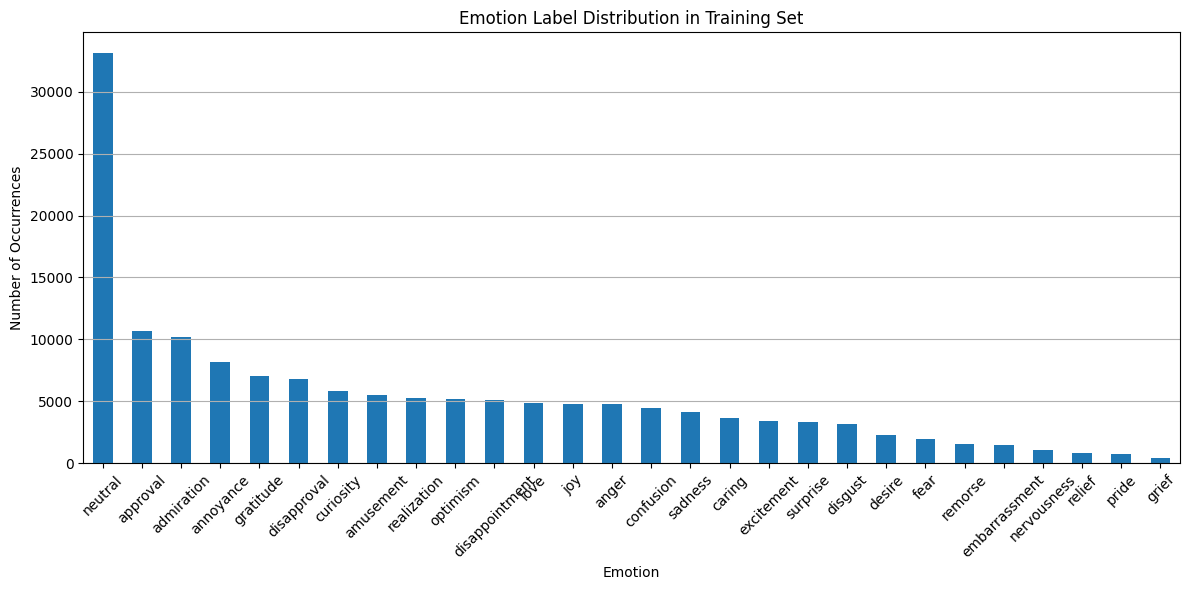

In [17]:
# Step 6: Inspect label frequency in the training set

# Count how many times each emotion appears
label_counts = train_df[LABEL_COLS].sum().sort_values(ascending=False)

# Display the counts
print("Label frequency in the training set:")
print(label_counts)

# Optional: plot label distribution for better visualization

plt.figure(figsize=(12, 6))
label_counts.plot(kind='bar')
plt.title("Emotion Label Distribution in Training Set")
plt.xlabel("Emotion")
plt.ylabel("Number of Occurrences")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### 2. Preprocessing

In [18]:
# Set max number of words to keep and max length of sequences
MAX_VOCAB_SIZE = 10000
MAX_SEQ_LENGTH = 50  # Truncate/pad all sequences to this length

# Step 1: Fit the tokenizer on training text
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df[TEXT_COL])

# Step 2: Convert text to sequences of integers
train_sequences = tokenizer.texts_to_sequences(train_df[TEXT_COL])
val_sequences   = tokenizer.texts_to_sequences(val_df[TEXT_COL])
test_sequences  = tokenizer.texts_to_sequences(test_df[TEXT_COL])

# Step 3: Pad all sequences to the same length
x_train = pad_sequences(train_sequences, maxlen=MAX_SEQ_LENGTH, padding='post')
x_val   = pad_sequences(val_sequences,   maxlen=MAX_SEQ_LENGTH, padding='post')
x_test  = pad_sequences(test_sequences,  maxlen=MAX_SEQ_LENGTH, padding='post')

# Step 4: Convert labels to numpy arrays
y_train = train_df[LABEL_COLS].values
y_val   = val_df[LABEL_COLS].values
y_test  = test_df[LABEL_COLS].values

# Check shape
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)



x_train shape: (126735, 50)
y_train shape: (126735, 28)


In [19]:
x_train[0]  # Check the first sequence

array([   3,  153,  110,  357,    2,  136,  155,    3, 1938,   97,  155,
          5,  136,   57,  260,    3,  110,  435,  331,  112,   20,  248,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0], dtype=int32)

In [20]:
y_train[0] # Check the first label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0])

In [21]:
train_df["text"]

161069    I always feel high the day after I smoke than ...
193935    I’m sorry. But, keep your respectability polit...
161748    It's much more common in English than in Germa...
156497    Optimism and emotions got us into this mess in...
128319    Them or me? I like to catch up on it in the af...
                                ...                        
204504                                          What a goal
207340    Yeah, fuck you for enjoying music! I'd love to...
166455    They don't even have to do "both sides," just ...
152612    Hopefully he gets better and comes back so the...
85697                                             Fuck you.
Name: text, Length: 126735, dtype: object

### 3. Models
### Dense Neural Network with Embedding and Pooling

#### 3.1 figuring out the perfect Sequence length

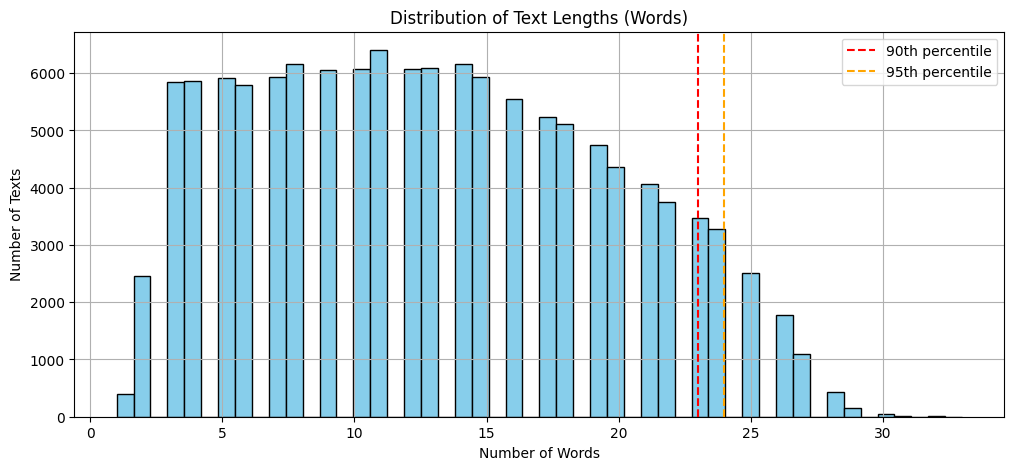

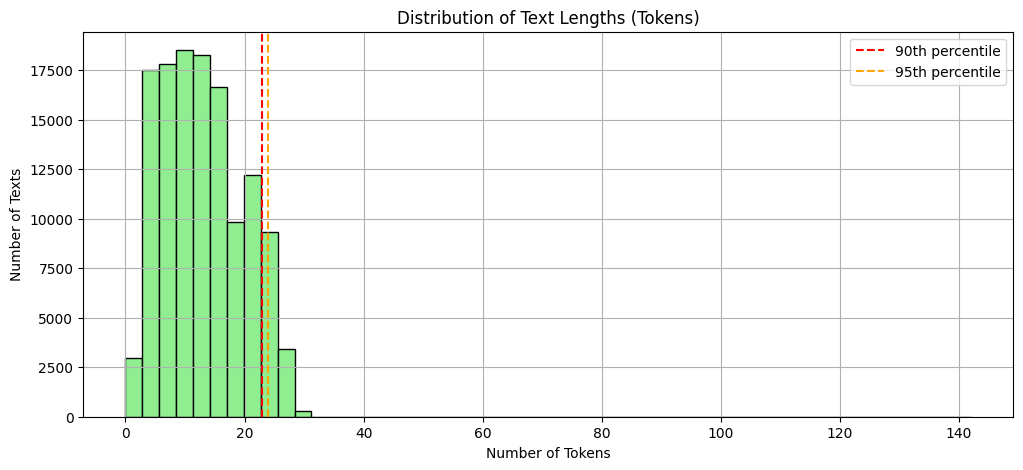

        Min  Max       Mean  Median  90th Percentile  95th Percentile  \
Words     1   33  12.978199    13.0             23.0             24.0   
Tokens    0  142  13.007859    13.0             23.0             24.0   

        99th Percentile  
Words              27.0  
Tokens             27.0  


In [22]:
# Sample text data (replace this with actual train_df["text"] in real use)
text_data = train_df["text"].astype(str).tolist()

# --- WORD-BASED LENGTHS ---
word_lengths = [len(text.split()) for text in text_data]

# --- TOKEN-BASED LENGTHS ---
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(text_data)
token_sequences = tokenizer.texts_to_sequences(text_data)
token_lengths = [len(seq) for seq in token_sequences]

# --- SUMMARY TABLE ---
stats = {
    "Min": [np.min(word_lengths), np.min(token_lengths)],
    "Max": [np.max(word_lengths), np.max(token_lengths)],
    "Mean": [np.mean(word_lengths), np.mean(token_lengths)],
    "Median": [np.median(word_lengths), np.median(token_lengths)],
    "90th Percentile": [np.percentile(word_lengths, 90), np.percentile(token_lengths, 90)],
    "95th Percentile": [np.percentile(word_lengths, 95), np.percentile(token_lengths, 95)],
    "99th Percentile": [np.percentile(word_lengths, 99), np.percentile(token_lengths, 99)],
}
stats_df = pd.DataFrame(stats, index=["Words", "Tokens"])

# --- PLOT WORD LENGTHS ---
plt.figure(figsize=(12, 5))
plt.hist(word_lengths, bins=50, color='skyblue', edgecolor='black')
plt.axvline(np.percentile(word_lengths, 90), color='red', linestyle='--', label='90th percentile')
plt.axvline(np.percentile(word_lengths, 95), color='orange', linestyle='--', label='95th percentile')
plt.title('Distribution of Text Lengths (Words)')
plt.xlabel('Number of Words')
plt.ylabel('Number of Texts')
plt.legend()
plt.grid(True)
plt.show()

# --- PLOT TOKEN LENGTHS ---
plt.figure(figsize=(12, 5))
plt.hist(token_lengths, bins=50, color='lightgreen', edgecolor='black')
plt.axvline(np.percentile(token_lengths, 90), color='red', linestyle='--', label='90th percentile')
plt.axvline(np.percentile(token_lengths, 95), color='orange', linestyle='--', label='95th percentile')
plt.title('Distribution of Text Lengths (Tokens)')
plt.xlabel('Number of Tokens')
plt.ylabel('Number of Texts')
plt.legend()
plt.grid(True)
plt.show()

print(stats_df)


As seen, a sequence length of 50 should be more than enough for our models

#### Model V1.1 Architecture


In [23]:

# === Model and Training Configuration ===
VOCAB_SIZE = 10000           # Only keep the top 10,000 most common words in the dataset
SEQUENCE_LENGTH = 50        # Each text is padded/truncated to 50 words
EMBEDDING_DIM = 64           # Each word will be represented as a 64-dimensional vector
NUM_LABELS = len(LABEL_COLS) # Number of emotions we're predicting (28)

# === Build a Simple Feedforward Neural Network ===
model = Sequential([
    # Embedding layer:
    # Takes a sequence of integers (word indices) and turns each into a trainable dense vector.
    # Input: [2, 58, 1, 7] → Output: [[...64 dims...], [...], [...], [...]]
    layers.Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=SEQUENCE_LENGTH),

    # GlobalAveragePooling1D:
    # Averages all word vectors into a single vector → compresses sequence info into one feature vector.
    # This flattens the 2D sequence into a single vector for the dense layer.
    layers.GlobalAveragePooling1D(),

    # Dense hidden layer with 64 units:
    # Learns intermediate features from the compressed text representation.
    layers.Dense(64, activation='relu'),

    # Output layer:
    # One neuron per label, with sigmoid activation (since it's a multi-label task).
    # Each output is independent → sigmoid gives a probability (0–1) for each label.
    layers.Dense(NUM_LABELS, activation='sigmoid')
])

# === Compile the Model ===
model.compile(
    loss='binary_crossentropy',  # Use binary cross-entropy because we're doing multi-label classification
    optimizer='adam',            # Adam optimizer (adaptive and fast learning)
    metrics=['accuracy']         # Basic metric — we can later add precision/recall/F1
)

# === Define Training Callbacks ===
callbacks = [
    EarlyStopping(
        monitor='val_loss',       # Watch validation loss for early stopping
        patience=3,               # Stop training if no improvement after 3 epochs
        restore_best_weights=True # Roll back to the best model seen so far
    ),
    ReduceLROnPlateau(
        monitor='val_loss',       # If val_loss plateaus, reduce learning rate
        factor=0.1,               # Reduce LR by a factor of 10
        patience=1                # Wait 1 epoch of stagnation before reducing LR
    )
]

# === Train the Model ===
history0 = model.fit(
    x_train, y_train,                # Tokenized and padded training texts + multi-label targets
    validation_data=(x_val, y_val), # Use validation set to monitor progress
    epochs=20,                       # Max number of training passes through data
    batch_size=128,                 # Number of samples per update
    callbacks=callbacks             # Use early stopping and adaptive LR
)


Epoch 1/20


/Users/paulkoslowsky/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


991/991 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2384 - loss: 0.1991 - val_accuracy: 0.2597 - val_loss: 0.1567 - learning_rate: 0.0010
Epoch 2/20
991/991 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2632 - loss: 0.1552 - val_accuracy: 0.2876 - val_loss: 0.1502 - learning_rate: 0.0010
Epoch 3/20
991/991 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2961 - loss: 0.1480 - val_accuracy: 0.3178 - val_loss: 0.1442 - learning_rate: 0.0010
Epoch 4/20
991/991 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3298 - loss: 0.1416 - val_accuracy: 0.3430 - val_loss: 0.1385 - learning_rate: 0.0010
Epoch 5/20
991/991 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3483 - loss: 0.1364 - val_accuracy: 0.3540 - val_loss: 0.1349 - learning_rate: 0.0010
Epoch 6/20
991/991 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3650 - loss: 0.1314 - val_accuracy: 0.3631 - val_loss: 0.1321 - learning_rate: 0.0010
Epoch 7/20
991/991 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3724 - loss: 0.1288 - val_accurac

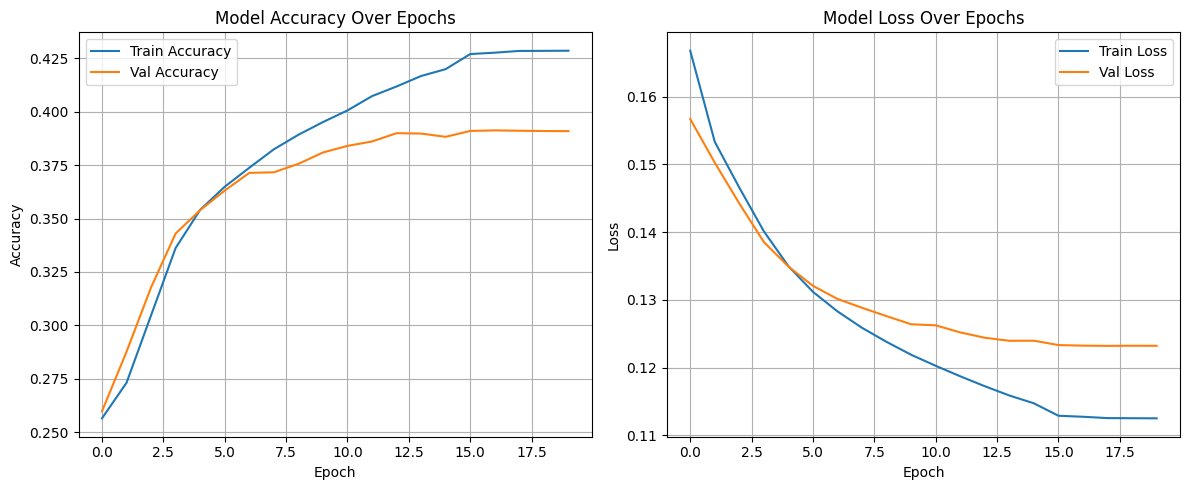

In [24]:
# === Accuracy Plot ===
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history0.history['accuracy'], label='Train Accuracy')
plt.plot(history0.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# === Loss Plot ===
plt.subplot(1, 2, 2)
plt.plot(history0.history['loss'], label='Train Loss')
plt.plot(history0.history['val_loss'], label='Val Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


#### Model V1.2 architecture

In [25]:
VOCAB_SIZE = 10000
SEQUENCE_LENGTH = 50
EMBEDDING_DIM = 64
NUM_LABELS = len(LABEL_COLS)

model = Sequential([
    layers.Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=SEQUENCE_LENGTH),
    layers.GlobalAveragePooling1D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(NUM_LABELS, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1)
]

history1 = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=40,
    batch_size=128,
    callbacks=callbacks
)


Epoch 1/40
991/991 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2180 - loss: 0.2159 - val_accuracy: 0.2597 - val_loss: 0.1569 - learning_rate: 0.0010
Epoch 2/40
991/991 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2631 - loss: 0.1556 - val_accuracy: 0.3061 - val_loss: 0.1454 - learning_rate: 0.0010
Epoch 3/40
991/991 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3176 - loss: 0.1427 - val_accuracy: 0.3420 - val_loss: 0.1387 - learning_rate: 0.0010
Epoch 4/40
991/991 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3468 - loss: 0.1362 - val_accuracy: 0.3514 - val_loss: 0.1349 - learning_rate: 0.0010
Epoch 5/40
991/991 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3652 - loss: 0.1314 - val_accuracy: 0.3650 - val_loss: 0.1318 - learning_rate: 0.0010
Epoch 6/40
991/991 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3778 - loss: 0.1276 - val_accuracy: 0.3709 - val_loss: 0.1296 - learning_rate: 0.0010
Epoch 7/40
991/991 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3867 - loss: 0.1252 - 

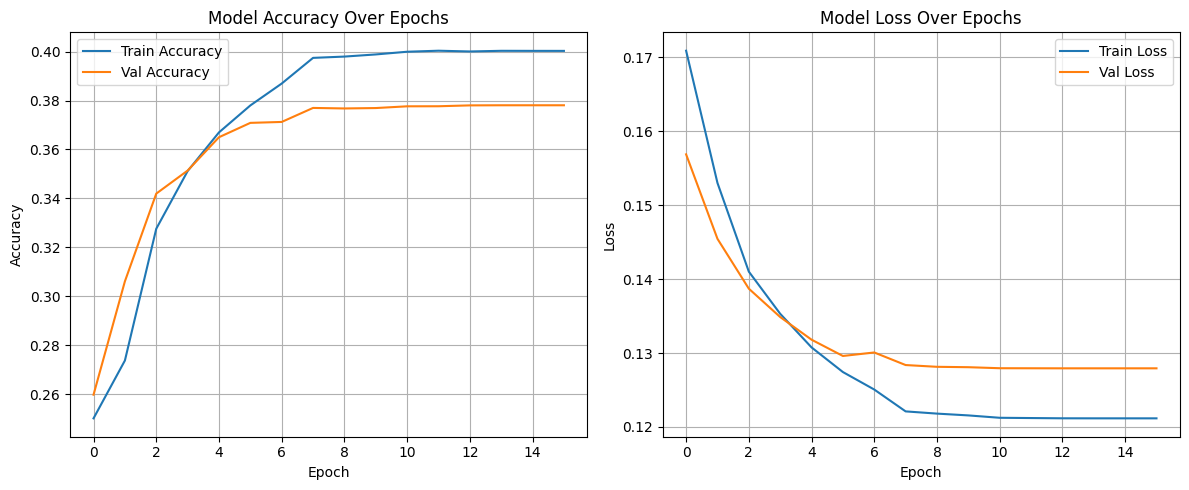

In [26]:
# === Accuracy Plot ===
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# === Loss Plot ===
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Train Loss')
plt.plot(history1.history['val_loss'], label='Val Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### Convolutional Neural Network
#### Model 2.1 **CNN**

In [27]:


VOCAB_SIZE = 10000
SEQUENCE_LENGTH = 50
EMBEDDING_DIM = 64
NUM_LABELS = len(LABEL_COLS)

model_cnn = Sequential([
    layers.Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=SEQUENCE_LENGTH),
    
    layers.Conv1D(filters=128, kernel_size=5, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    
    layers.Conv1D(filters=64, kernel_size=5, activation='relu'),
    layers.GlobalMaxPooling1D(),
    
    layers.Dense(64, activation='relu'),
    layers.Dense(NUM_LABELS, activation='sigmoid')
])


model = models.Sequential([
    # Feature extraction
    layers.Conv2D( filters = 32, kernel_size = (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPool2D(pool_size = (2, 2)),

    layers.Conv2D( filters = 64, kernel_size = (3, 3), activation='relu'),
    layers.MaxPool2D(pool_size = (2, 2)),
    
    layers.Conv2D( filters = 64, kernel_size = (3, 3), activation='relu'),
    # Classification
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
]
)




model_cnn.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1)
]

history_cnn = model_cnn.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=40,
    batch_size=128,
    callbacks=callbacks
)


Epoch 1/40
991/991 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.2401 - loss: 0.1933 - val_accuracy: 0.3531 - val_loss: 0.1385 - learning_rate: 0.0010
Epoch 2/40
991/991 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.3652 - loss: 0.1331 - val_accuracy: 0.3766 - val_loss: 0.1284 - learning_rate: 0.0010
Epoch 3/40
991/991 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.3977 - loss: 0.1228 - val_accuracy: 0.3874 - val_loss: 0.1253 - learning_rate: 0.0010
Epoch 4/40
991/991 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.4165 - loss: 0.1168 - val_accuracy: 0.3943 - val_loss: 0.1241 - learning_rate: 0.0010
Epoch 5/40
991/991 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.4338 - loss: 0.1123 - val_accuracy: 0.3896 - val_loss: 0.1233 - learning_rate: 0.0010
Epoch 6/40
991/991 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.4496 - loss: 0.1080 - val_accuracy: 0.3875 - val_loss: 0.1250 - learning_rate: 0.0010
Epoch 7/40
991/991 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.4734 - l

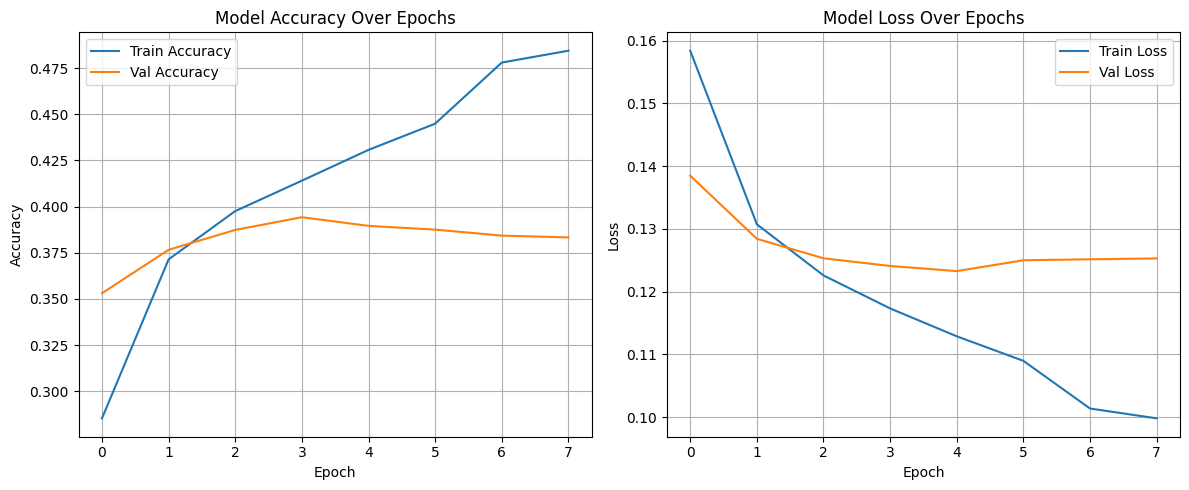

In [28]:
# === Accuracy Plot ===
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# === Loss Plot ===
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Val Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
